![Curso Schwarz-Sosa-Suriano](http://www.fi.uba.ar/sites/default/files/logo.png)
# <center> ANÁLISIS NUMÉRICO I - MODELACIÓN NUMÉRICA - MÉTODOS MATEMÁTICOS Y NUMÉRICOS

## <center> LOS ALGORITMOS Y LA REPRESENTACIÓN NUMÉRICA

   Supongamos que tenemos que calcular los valores $y_n$ definidos por la siguiente expresión:

$$y_n=\int_0^1{\frac{x^n}{x+b}}\:\mathrm d x.$$

   Es fácil notar que obtener el valor de $y$ para $n=0$, es decir, $y_0$, es muy sencillo, pues:

$$y_0=\int_0^1{\frac{x^0}{x+b}}\:\mathrm d x=\int_0^1{\frac{1}{x+b}}\:\mathrm d x=\left.\ln(x+b) \right|_0^1=\ln(1+b)-\ln(b)=\ln\left(1+\frac{1}{b} \right)$$

   Obtener valores de $y_n$ con $n\geq1$ requiere que calculemos las integrales. Hay dos maneras de hacerlo: nos ayudamos con una tabla de integrales o con un programa de procesamiento simbólico, o utilizamos algún programa que calcule las integrales definidas.
   
   Para este ejemplo, resolveremos cada valor $y_j$ con ayuda de un programa que cuenta con un procesador simbólico. Hay varios programas con esta facilidad. En este caso, el lenguaje Python nos ayudan para obtener estos resultados. (A tener en cuenta: no siempre los programas hacen lo que aseguran hacer.)
   
Por eso, importamos el procesador simbólico, <b>Sympy</b>, y uno de los programas con algoritmos numéricos de Python, <b>Numpy</b>, que facilita la función $\ln(x)$. (En Numpy, $\ln(x)$ es $\log(x)$).

In [1]:
import sympy as sy #Importamos Sympy.
import numpy as np #Importamos Numpy.

  Definimos una función, que llamaremos Algo1, que ejecuta la integral «simbólica» para obtener un conjunto de valores $y_j$ con $j\in(0,n)$.

In [102]:
def Algo1(b,n):
    x=sy.symbols('x')
    y=np.zeros(n+1)
    #y[0]=np.log(1+1/b)
    for j in range(0,n+1):
        y[j]=sy.integrate(x**j/(x+b),(x,0,1))
    #for j in range (0,n):
    #    print("Para n=",j,"la integral es:",y[j])
    print("El valor de la integral para n=",n,"es",y[n],".")    

Comprobemos si el algoritmo para calcular el valor de un $y_j$ cualquiera está correcto. Calculemos el valor de $y_0$ con $b=10$.

In [103]:
Algo1(10,0)

El valor de la integral para n= 0 es 0.09531017980432487 .


Por lo que vimos antes, calcular $y_0$ es muy sencillo:

$$y_0=\ln\left(1+\frac{1}{b}\right).$$

Calculemos este valor usando la función $\log(x)$ de Numpy. Tomemos $b=1$ y $n=0$.

In [20]:
np.log(1+1/10)

0.09531017980432493

Podemos notar que el resultado es muy similar, pero hay una pequeña diferencia en los últimos dos decimales.

Nos interesa saber si estamos haciendo los desarrollos en forma correcta. En consecuencia, calcularemos la integral definida mediante un método numérico muy conocido, la Cuadratura de Gauss-Legendre, método que analizaremos más adelante en el curso.

Creamos para ello una nueva función o algoritmo, que llamamos Algo2.

In [104]:
def Algo2(b,n):
    x1=(1-0.8611363116)*0.5
    x2=(1-0.3399810436)*0.5
    x3=(1+0.3399810436)*0.5
    x4=(1+0.8611363116)*0.5
    c1=0.3478548451*0.5
    c2=0.6521451549*0.5
    c3=c2
    c4=c1
    y=np.zeros(n+1)
    #y[0]=np.log(1+1/b)
    for j in range(0,n+1):
        y[j]=c1*x1**j/(x1+b)+c2*x2**j/(x2+b)+c3*x3**j/(x3+b)+c4*x4**j/(x4+b)
    #for j in range(0,n):
    #    print("Para n=",j,"la integral es:",y[j])
    print("El valor de la integral para n=",n,"es",y[n],".")   

Calculemos con este algoritmo el valor de $y_0$.

In [105]:
Algo2(10,0)

El valor de la integral para n= 0 es 0.09531017980430732 .


Si comparamos con los valores anteriores, queda en evidencia que el resultado obtenido mediante el método numérico no es «igual» que el obtenido con la primitiva, y también difiere del resultado «simbólico» mostrado por Sympy. Podríamos decir que estamos haciendo las cosas bien. 

Si recordamos el valor anterior:

In [106]:
np.log(1.1)

0.09531017980432493

Como nuestro objetivo es la aplicación de métodos numéricos, vamos a desarrollar otro a partir de la expresión simbólica; un modelo numérico iterativo para obtener los valores de un $y_n$ cualquiera. Si tenemos que

$$y_n=\int_0^1{\frac{x^n}{x+b}}\:\mathrm d x\quad \text{y}\quad y_{n-1}=\int_0^1{\frac{x^{n-1}}{x+b}}\:\mathrm d x$$

podemos definir lo siguiente:

$$y_n+b\cdot y_{n-1}=\int_0^1{\frac{x^n+b \cdot x^{n-1}}{x+b}}\:\mathrm d x=\int_0^1{\frac{x+b}{x+b}\cdot x^{n-1}}\:\mathrm d x =\int_0^1x^{n-1}\:\mathrm d x=\left.\frac{1}{n}\cdot x^n\right|_0^1=\frac{1}{n},$$

y entonces nos queda:

$$y_n=\frac{1}{n}-b\cdot y_{n-1},$$

un algoritmo iterativo que nos facilita obtener un $y_n$ a partir de conocer el $y_{n-1}$. Para poder empezar a iterar, primero debemos calcular el valor inicial, $y_0$:

$$y_0=\ln\left(1+\frac{1}{b} \right),$$

que ya habíamos calculado. Como en muchos modelos numéricos, necesitamos un valor inicial para ejecutar nuestro proceso iterativo. Nuestro nuevo algoritmo los llamamos Algo3.

In [119]:
def Algo3(b,n):
    y=np.zeros(n+1)
    y[0]=0.0953101798
    for j in range(1,n+1):
        y[j]=1/j-b*y[j-1]
    #for j in range(0,n):
    #    print("Para n=",j,"la integral es:",y[j])
    print("El valor de la integral para n=",n,"es",y[n],".") 

Nuevamente, verifiquemos que nuestro nuevo algoritmo está correcto y calculemos el valor para $y_0$:

In [120]:
Algo3(10,0)

El valor de la integral para n= 0 es 0.0953101798 .


Una vez más, si comparamos con los resultados anteriores, el resultado obtenido es similar o igual.

Ahora calculemos varios valores para distintos $y_j$. Para verificar los resultados, particularmente de Algo3, los algoritmos mostrarán los valores previos.

In [121]:
Algo1(10,8)

El valor de la integral para n= 8 es 0.010194390766299974 .


In [111]:
Algo2(10,8)

El valor de la integral para n= 8 es 0.010192921681960935 .


In [122]:
Algo3(10,8)

El valor de la integral para n= 8 es 0.009761905319405795 .


Todos nos entregan resultados parecidos. Como una forma de establecer cuál de todos los algoritmos es el que mejor aproxima los resultados que estamos buscando, representemos gráficamente las funciones a integrar.

Para ello vamos a importar el graficador MatPlotLib:

In [123]:
import matplotlib.pyplot as plt

Definamos ahora las funciones de las integrales que determinan a los $y_n$.

In [30]:
def f(b,n,x): #Define una función con tres variables: «b», «n» y «x». Esta última es la variable libre.
    return x**n/(x+b)

Probemos una función cualquiera en $x=1$:

In [113]:
f(10,1,1)

0.09090909090909091

Probemos otro caso, ahora con $n=5$.

In [114]:
f(10,5,1)

0.09090909090909091

Probemos el caso $n=10$:

In [115]:
f(10,10,1)

0.09090909090909091

Puesto que cada función es

$$f_j(x)=\frac{x^j}{x+b},$$

cuando $x=1$ tenemos que $$f_j(1)=\frac{1^j}{1+b}=\frac{1}{1+b}.$$

Si $b=10$, entonces siempre tendremos que:

$$f_j(1)=\frac{1}{11}=0{,}0909090909...$$

Como ya tenemos la función definida, podemos representemos varias de las funciones que forman el integrando, es decir, fijamos $b=10$ y tomamos varios valores de $n$.

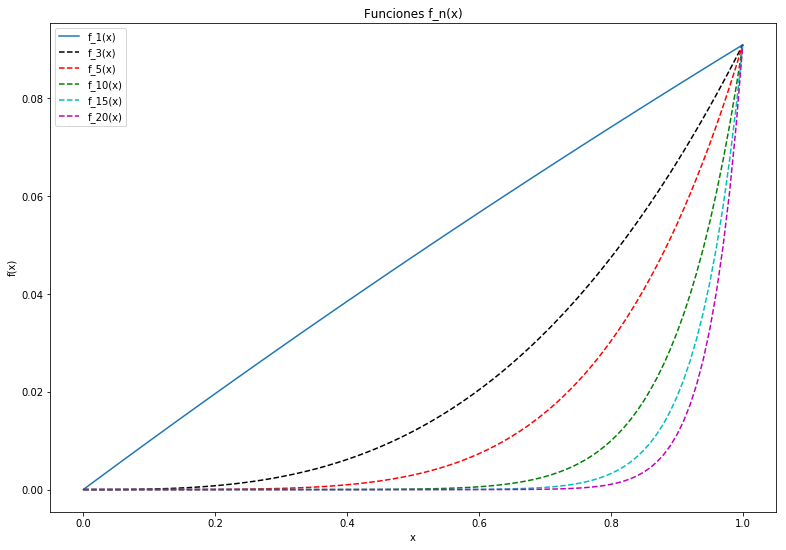

In [98]:
plt.figure(figsize=(13,9))
x = np.arange(0, 1.01, 0.01)
plt.plot(x,f(10,1,x),label='f_1(x)') #Función con n=1.
plt.plot(x,f(10,3,x),'k--', label='f_3(x)') #Función con n=3.
plt.plot(x,f(10,5,x),'r--',label='f_5(x)') #Función con n=5.
plt.plot(x,f(10,10,x),'g--',label='f_10(x)') #Función con n=10.
plt.plot(x,f(10,15,x),'c--',label='f_15(x)') #Función con n=15.
plt.plot(x,f(10,20,x),'m--',label='f_20(x)') #Función con n=20.
plt.title('Funciones f_n(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(loc=0)
plt.show()

Veamos qué pasa si aumentamos el valor de $n$ en nuestros algoritmos.

Primero ejecutemos el algoritmo 1.

In [129]:
Algo1(10,9)

El valor de la integral para n= 9 es 0.00916720344811137 .


Ahora ejecutemos el algoritmo 2.

In [128]:
Algo2(10,9)

El valor de la integral para n= 9 es 0.00915921854846166 .


Finalmente, el algoritmo 3.

In [127]:
Algo3(10,9)

El valor de la integral para n= 9 es 0.013492057917053157 .


Si comparamos resultados, podemos ver que el valor para $y_{20}$ del algoritmo 3 difiere notablemente respecto del valor de $y_{20}$ calculado por los otros dos algoritmos. También que el valor $y_{20}$ obtenido mediante el algoritmo 2 es levemente diferente al $y_{20}$ obtenido con el algoritmo 1.